In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
def moving_average(a, n=7) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

# Cheeting:

* there are negative values in the diff(data), I replace it with zero.
* Nan values are replaced with previous value

In [4]:

home = "../../"
county_data = pd.read_csv(f"{home}/code/hun_codes/data/halalozas_megyenkent.csv").fillna(method='ffill')

In [26]:
home = "../../"
county_data = pd.read_csv(f"{home}/code/hun_codes/data/halalozas_megyenkent.csv").fillna(method='ffill')
#county_data=county_data.rename(lambda l: l if l!="Budapest" else "főváros")[county_data.columns[1:]].dropna()
county_data=county_data.rename(lambda l: l if l!="Budapest" else "főváros")[county_data.columns[1:]].diff(axis=0).dropna()
county_data[county_data<0]=0
county_data = county_data.rolling(7).mean().dropna()

sim_data = pd.read_csv(f"{home}/code/control_panel/log/county.csv")
c_charts = [(label,np.array(sim_data[label])) for label in sim_data.columns[1:]]

In [27]:
county_data

,Bács-Kiskun,Baranya,Békés,Borsod-Abaúj-Zemplén,Budapest,Csongrád,Fejér,Győr-Moson-Sopron,Hajdú-Bihar,Heves,...,Komárom-Esztergom,Nógrád,Pest,Somogy,Szabolcs-Szatmár-Bereg,Tolna,Vas,Veszprém,Zala,Összesen
7,1.571429,0.571429,0.857143,0.285714,18.571429,2.142857,3.857143,1.571429,1.000000,0.285714,...,0.571429,0.857143,9.142857,0.714286,1.428571,0.857143,0.571429,0.428571,0.714286,46.428571
8,1.571429,0.571429,1.000000,0.285714,22.142857,3.285714,5.142857,1.571429,0.857143,0.142857,...,0.571429,1.000000,9.428571,0.857143,1.571429,0.857143,0.428571,0.571429,0.571429,52.857143
9,0.571429,0.571429,1.142857,0.714286,26.428571,2.714286,5.285714,1.285714,0.714286,0.142857,...,0.714286,0.857143,8.714286,0.857143,1.285714,0.857143,0.428571,1.142857,1.714286,56.428571
10,0.571429,1.000000,1.000000,0.714286,45.571429,2.714286,7.285714,2.142857,0.857143,0.285714,...,0.428571,0.714286,10.000000,0.714286,1.285714,0.857143,0.571429,1.857143,2.142857,81.000000
11,0.571429,1.142857,0.714286,1.142857,52.000000,2.714286,8.714286,1.571429,0.571429,0.714286,...,0.857143,1.285714,9.285714,0.857143,1.285714,0.857143,0.428571,2.571429,2.285714,90.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,43.142857,89.142857,34.857143,91.000000,215.428571,45.142857,41.285714,66.714286,71.857143,35.571429,...,28.571429,25.571429,132.571429,40.571429,84.142857,26.857143,27.571429,48.714286,21.000000,1209.142857
714,36.000000,73.714286,28.571429,77.142857,184.285714,39.571429,35.857143,57.571429,60.142857,28.714286,...,24.285714,21.857143,114.714286,33.000000,66.428571,20.571429,21.571429,39.000000,15.285714,1011.000000
715,46.428571,78.857143,28.714286,91.571429,285.714286,60.571429,49.571429,78.571429,78.000000,33.000000,...,35.000000,31.000000,151.714286,44.142857,84.142857,22.428571,30.857143,54.142857,15.571429,1335.285714
716,44.857143,68.571429,29.571429,82.428571,264.142857,55.714286,44.857143,69.714286,67.857143,29.000000,...,31.571429,27.000000,134.714286,40.142857,78.000000,21.285714,28.571429,58.142857,17.285714,1224.714286


In [32]:
x = 80
equal_ratio = np.sum([chart for label,chart in c_charts])/np.sum(county_data.iloc[x:200+x].fillna(0).values)

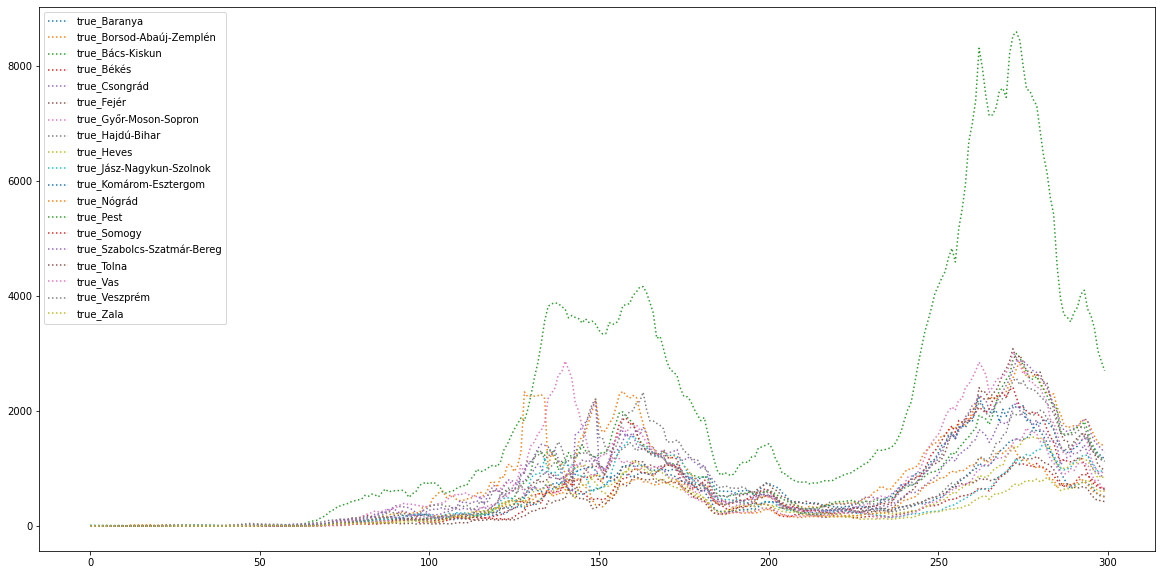

In [36]:
plt.figure(figsize=(20,10))
for county,chart in c_charts[:]:
    #plt.plot(chart, label=county)
    if(county=="főváros"):
        continue
    else:
        plt.plot(equal_ratio*county_data[county][x:300+x].to_numpy(), label="true_"+county, linestyle='dotted')
plt.legend()
plt.show()

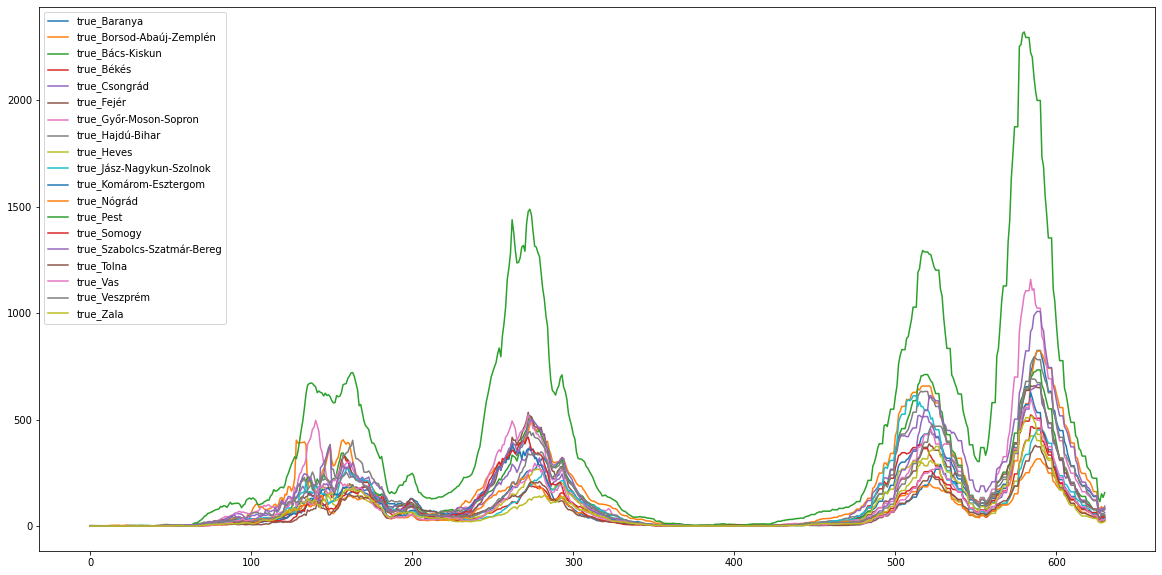

In [146]:
plt.figure(figsize=(20,10))
for county,chart in c_charts:
    #plt.plot(0.1*chart, label=county)
    if(county=="főváros"):
        continue
    else:
        plt.plot(county_data[county].to_numpy()[80:], label="true_"+county)
plt.legend()    
plt.show()


In [147]:
np.array(county_data["Nógrád"])[:250]

array([8.57142857e-01, 1.00000000e+00, 8.57142857e-01, 7.14285714e-01,
       1.28571429e+00, 1.14285714e+00, 1.28571429e+00, 1.14285714e+00,
       1.00000000e+00, 1.00000000e+00, 1.14285714e+00, 4.28571429e-01,
       5.71428571e-01, 4.28571429e-01, 5.71428571e-01, 5.71428571e-01,
       5.71428571e-01, 4.28571429e-01, 4.28571429e-01, 1.42857143e-01,
       1.42857143e-01, 0.00000000e+00, 1.42857143e-01, 1.42857143e-01,
       1.42857143e-01, 1.42857143e-01, 1.42857143e-01, 1.42857143e-01,
       1.42857143e-01, 1.42857143e-01, 1.42857143e-01, 1.42857143e-01,
       1.42857143e-01, 1.42857143e-01, 1.42857143e-01, 1.42857143e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.42857143e-01,
       2.85714286e-01, 4.28571429e-01, 8.57142857e-01, 1.00000000e+00,
       1.00000000e+00, 1.28571429e+00, 1.28571429e+00, 1.28571429e+00,
       1.28571429e+00, 1.57142857e+00, 1.57142857e+00, 1.57142857e+00,
      

In [148]:
np.array(county_data["Borsod-Abaúj-Zemplén"])[:250].astype(int)

array([  0,   0,   0,   0,   1,   5,   5,   5,   5,   5,   6,   5,   1,
         1,   1,   0,   0,   0,   1,   1,   1,   1,   1,   1,   1,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
         1,   3,   3,   3,   3,   3,   3,   4,   2,   2,   3,   3,   4,
         3,   2,   3,   2,   2,   1,   1,   1,   0,   0,   0,   0,   0,
         0,   0,   1,   1,   2,   2,   2,   2,   2,   1,   1,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   1,   1,
         2,   3,   3,   4,   4,   4,   5,   5,   6,   6,   9,  12,  12,
        13,  15,  17,  16,  19,  16,  17,  20,  21,  22,  29,  27,  32,
        37,  35,  39,  42,  40,  37,  39,  40,  39,  55,  57,  6

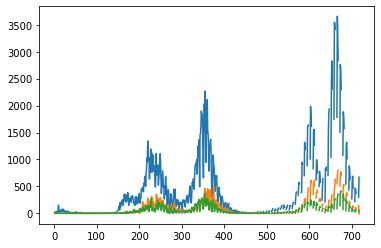

In [80]:
county_data = pd.read_csv(f"{home}/code/hun_codes/data/halalozas_megyenkent.csv")

plt.plot(county_data["Budapest"].diff())
plt.plot(county_data["Veszprém"].diff())
plt.plot(county_data["Nógrád"].diff())

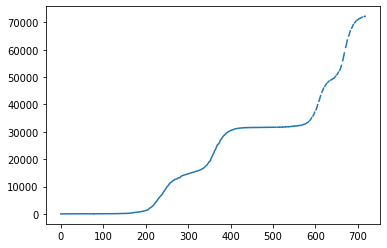

In [81]:
plt.plot(county_data["Veszprém"])

In [5]:
np.array(county_data["Nógrád"])[:250]

array([5.000e+00, 5.000e+00, 6.000e+00, 7.000e+00, 8.000e+00, 1.000e+01,
       1.000e+01, 1.100e+01, 1.200e+01, 1.200e+01, 1.200e+01, 1.700e+01,
       1.800e+01, 1.900e+01, 1.900e+01, 1.900e+01, 1.900e+01, 2.000e+01,
       2.000e+01, 2.200e+01, 2.200e+01, 2.300e+01, 2.300e+01, 2.300e+01,
       2.300e+01, 2.300e+01, 2.300e+01, 2.300e+01, 2.300e+01, 2.400e+01,
       2.400e+01, 2.400e+01, 2.400e+01, 2.400e+01, 2.400e+01, 2.400e+01,
       2.500e+01, 2.500e+01, 2.500e+01, 2.500e+01, 2.500e+01, 2.500e+01,
       2.500e+01, 2.500e+01, 2.500e+01, 2.500e+01, 2.500e+01, 2.500e+01,
       2.500e+01, 2.500e+01, 2.600e+01, 2.700e+01, 2.800e+01, 3.100e+01,
       3.200e+01, 3.200e+01, 3.400e+01, 3.500e+01, 3.600e+01, 3.700e+01,
       4.200e+01, 4.300e+01, 4.300e+01, 4.300e+01, 4.700e+01, 4.700e+01,
       4.700e+01, 5.000e+01, 5.200e+01, 5.200e+01, 5.200e+01, 5.200e+01,
       5.200e+01, 4.900e+01, 5.100e+01, 5.100e+01, 5.100e+01, 5.100e+01,
       5.100e+01, 5.100e+01, 5.100e+01, 5.100e+01, 

In [74]:
np.array(county_data["Komárom-Esztergom"])[:250]

array([  12.,   12.,   13.,   15.,   14.,   14.,   14.,   15.,   15.,
         17.,   17.,   20.,   20.,   20.,   20.,   20.,   21.,   23.,
         25.,   32.,   43.,   48.,   48.,   64.,   67.,   70.,   72.,
         87.,   92.,   93.,  101.,  110.,  121.,  132.,  137.,  141.,
        148.,  157.,  162.,  166.,  168.,  173.,  174.,  176.,  180.,
        183.,  184.,  195.,  198.,  199.,  206.,  214.,  222.,  234.,
        236.,  243.,  244.,  243.,  250.,  252.,  259.,  259.,  262.,
        264.,  268.,  272.,  273.,  278.,  283.,  283.,  285.,  287.,
        290.,  295.,  298.,  298.,  300.,   nan,  301.,  301.,  301.,
        301.,  301.,  302.,  302.,  302.,  305.,  305.,  307.,  307.,
        307.,  307.,  307.,  307.,  307.,  307.,  307.,  307.,  307.,
        307.,  307.,  307.,  308.,  308.,  308.,  308.,  308.,  308.,
        308.,  308.,  308.,  308.,  308.,  309.,  309.,  310.,  312.,
        312.,  312.,  312.,  312.,  312.,  312.,  312.,  312.,  312.,
        312.,  312.,

In [152]:
len(set(pd.read_csv("../../data/hun/HU_places_admin_pop_ZIP_latlon.csv")["admin municip"]))

175

In [156]:
set(pd.read_csv("../../data/hun/HU_places_admin_pop_ZIP_latlon.csv")["admin municip"])

{'Aba',
 'Adony',
 'Ajka',
 'Aszód',
 'Baja',
 'Baktalórántháza',
 'Balassagyarmat',
 'Balatonalmádi',
 'Balatonföldvár',
 'Balatonfüred',
 'Balmazújváros',
 'Barcs',
 'Berettyóújfalu',
 'Bicske',
 'Bonyhád',
 'Budapest',
 'Budaörs',
 'Bácsalmás',
 'Bátonyterenye',
 'Békés',
 'Békéscsaba',
 'Bélapátfalva',
 'Cegléd',
 'Celldömölk',
 'Cigánd',
 'Csenger',
 'Csepreg',
 'Csongrád',
 'Csorna',
 'Csurgó',
 'Dabas',
 'Debrecen',
 'Devecser',
 'Dombóvár',
 'Dorog',
 'Dunakeszi',
 'Dunaújváros',
 'Edelény',
 'Eger',
 'Encs',
 'Enying',
 'Ercsi',
 'Esztergom',
 'Fehérgyarmat',
 'Fonyód',
 'Füzesabony',
 'Gyula',
 'Gyál',
 'Gyöngyös',
 'Győr',
 'Gárdony',
 'Gödöllő',
 'Gönc',
 'Hajdúböszörmény',
 'Hajdúhadház',
 'Hajdúszoboszló',
 'Hatvan',
 'Heves',
 'Hévíz',
 'Hódmezővásárhely',
 'Ibrány',
 'Jánoshalma',
 'Jászberény',
 'Kadarkút',
 'Kalocsa',
 'Kaposvár',
 'Kapuvár',
 'Karcag',
 'Kazincbarcika',
 'Kecskemét',
 'Keszthely',
 'Kisbér',
 'Kiskunfélegyháza',
 'Kiskunhalas',
 'Kiskunmajsa',
 'Kisk

In [50]:
df = pd.DataFrame({'A':[1,np.nan,3], 'B':[1,4,9]})
df

,A,B
0,1.0,1
1,NaN,4
2,3.0,9


In [52]:
df.diff(axis=0)

,A,B
0,NaN,NaN
1,NaN,3.0
2,NaN,5.0


In [39]:
equal_ratio

0.011970800493717536

In [30]:
print(np.sum([chart for label,chart in c_charts]), np.sum(county_data.iloc[:,1:-1].fillna(0).values))

2719665 322420794.0


In [21]:
county_data

,Dátum,Bács-Kiskun,Baranya,Békés,Borsod-Abaúj-Zemplén,Budapest,Csongrád,Fejér,Győr-Moson-Sopron,Hajdú-Bihar,...,Komárom-Esztergom,Nógrád,Pest,Somogy,Szabolcs-Szatmár-Bereg,Tolna,Vas,Veszprém,Zala,Összesen
0,2020-03-31,8.0,20.0,3.0,6.0,215.0,17.0,12.0,25.0,8.0,...,12.0,5.0,89.0,11.0,24.0,7.0,8.0,10.0,6.0,492.0
1,2020-04-01,8.0,19.0,3.0,6.0,232.0,17.0,13.0,26.0,9.0,...,12.0,5.0,98.0,11.0,25.0,7.0,9.0,10.0,7.0,525.0
2,2020-04-02,15.0,19.0,3.0,6.0,243.0,21.0,18.0,28.0,10.0,...,13.0,6.0,122.0,11.0,27.0,7.0,9.0,10.0,7.0,585.0
3,2020-04-03,17.0,21.0,4.0,6.0,261.0,23.0,21.0,28.0,11.0,...,15.0,7.0,124.0,12.0,28.0,7.0,9.0,10.0,8.0,623.0
4,2020-04-04,18.0,21.0,6.0,5.0,291.0,25.0,21.0,33.0,13.0,...,14.0,8.0,134.0,12.0,28.0,7.0,11.0,10.0,10.0,677.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,2022-03-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
714,2022-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
715,2022-03-16,91922.0,75471.0,53140.0,106553.0,317565.0,77244.0,75770.0,97927.0,96167.0,...,57445.0,40237.0,247676.0,57391.0,98605.0,38630.0,52524.0,72071.0,47927.0,1819264.0
716,2022-03-17,91978.0,75572.0,53204.0,106656.0,317859.0,77304.0,75819.0,98013.0,96244.0,...,57483.0,40266.0,247827.0,57438.0,98716.0,38676.0,52547.0,72212.0,47967.0,1820867.0
